In [1]:
import sys
from importlib import reload 
sys.path.append('./lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [7]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("euclidian_corrected", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_3():
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (6, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_exp_dot(k=1):
    return [
        ProductDistances([
            (10, Distances("exp_minus_dot", scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_4():
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
    ]

_____________


In [121]:
with open("bg_20_700_0.05.edges", "w") as f:
    for i in range(20):
        for j in range(700):
            if np.random.random() > 0.95:
                f.write(f"{i} {20 + j}\n")

In [8]:
G, distances_matrix, r_matrix  = utils.get_dataset("bg_20_700_0.05.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/bg_20_700_0.05.edges
|V| = 432, |E| = 648


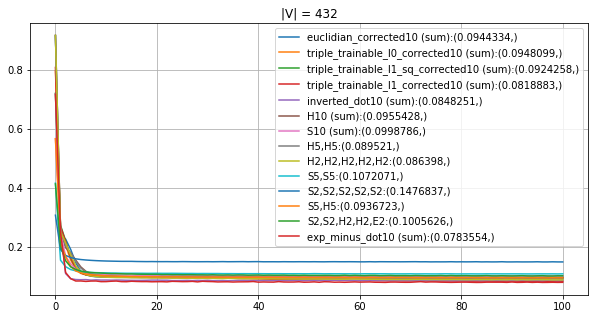

0.0944334	euclidian_corrected10 (sum)
0.0948099	triple_trainable_l0_corrected10 (sum)
0.0924258	triple_trainable_l1_sq_corrected10 (sum)
0.0818883	triple_trainable_l1_corrected10 (sum)
0.0848251	inverted_dot10 (sum)
0.0955428	H10 (sum)
0.0998786	S10 (sum)
0.089521	H5,H5
0.086398	H2,H2,H2,H2,H2
0.1072071	S5,S5
0.1476837	S2,S2,S2,S2,S2
0.0936723	S5,H5
0.1005626	S2,S2,H2,H2,E2
0.0783554	exp_minus_dot10 (sum)


In [123]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances()+make_distances_exp_dot(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

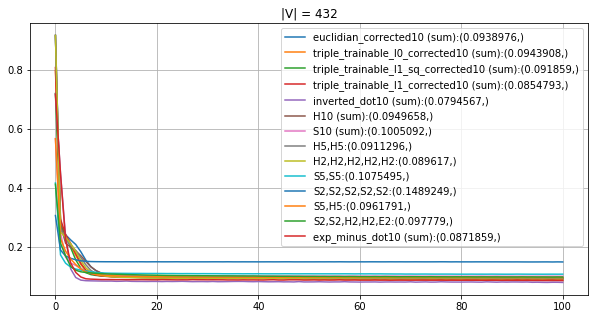

0.0938976	euclidian_corrected10 (sum)
0.0943908	triple_trainable_l0_corrected10 (sum)
0.091859	triple_trainable_l1_sq_corrected10 (sum)
0.0854793	triple_trainable_l1_corrected10 (sum)
0.0794567	inverted_dot10 (sum)
0.0949658	H10 (sum)
0.1005092	S10 (sum)
0.0911296	H5,H5
0.089617	H2,H2,H2,H2,H2
0.1075495	S5,S5
0.1489249	S2,S2,S2,S2,S2
0.0961791	S5,H5
0.097779	S2,S2,H2,H2,E2
0.0871859	exp_minus_dot10 (sum)


In [124]:
total_loss_story_2 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances()+make_distances_exp_dot(), 2000, learning_rate=0.05,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

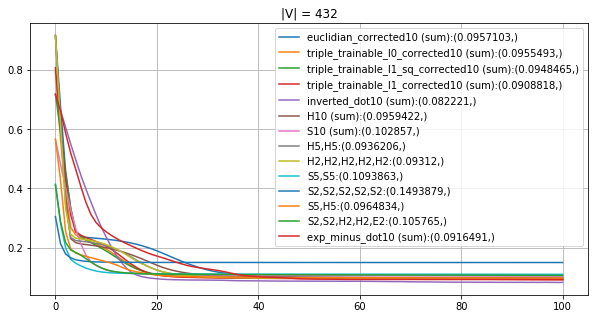

0.0957103	euclidian_corrected10 (sum)
0.0955493	triple_trainable_l0_corrected10 (sum)
0.0948465	triple_trainable_l1_sq_corrected10 (sum)
0.0908818	triple_trainable_l1_corrected10 (sum)
0.082221	inverted_dot10 (sum)
0.0959422	H10 (sum)
0.102857	S10 (sum)
0.0936206	H5,H5
0.09312	H2,H2,H2,H2,H2
0.1093863	S5,S5
0.1493879	S2,S2,S2,S2,S2
0.0964834	S5,H5
0.105765	S2,S2,H2,H2,E2
0.0916491	exp_minus_dot10 (sum)


In [125]:
total_loss_story_3 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances()+make_distances_exp_dot(), 2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

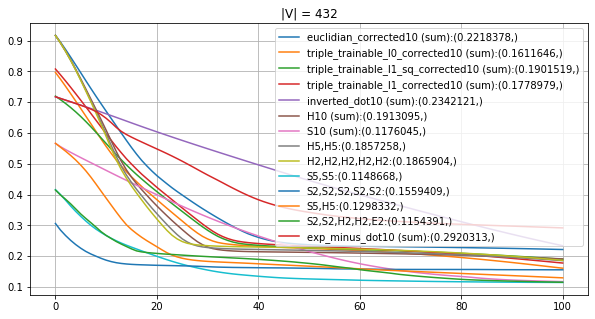

0.2218378	euclidian_corrected10 (sum)
0.1611646	triple_trainable_l0_corrected10 (sum)
0.1901519	triple_trainable_l1_sq_corrected10 (sum)
0.1778979	triple_trainable_l1_corrected10 (sum)
0.2342121	inverted_dot10 (sum)
0.1913095	H10 (sum)
0.1176045	S10 (sum)
0.1857258	H5,H5
0.1865904	H2,H2,H2,H2,H2
0.1148668	S5,S5
0.1559409	S2,S2,S2,S2,S2
0.1298332	S5,H5
0.1154391	S2,S2,H2,H2,E2
0.2920313	exp_minus_dot10 (sum)


In [126]:
total_loss_story_4 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances()+make_distances_exp_dot(), 2000, learning_rate=0.001,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

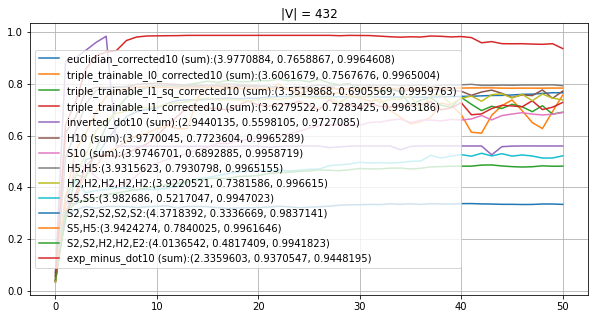

0.7658867	euclidian_corrected10 (sum)
0.7567676	triple_trainable_l0_corrected10 (sum)
0.6905569	triple_trainable_l1_sq_corrected10 (sum)
0.7283425	triple_trainable_l1_corrected10 (sum)
0.5598105	inverted_dot10 (sum)
0.7723604	H10 (sum)
0.6892885	S10 (sum)
0.7930798	H5,H5
0.7381586	H2,H2,H2,H2,H2
0.5217047	S5,S5
0.3336669	S2,S2,S2,S2,S2
0.7840025	S5,H5
0.4817409	S2,S2,H2,H2,E2
0.9370547	exp_minus_dot10 (sum)


In [127]:
total_loss_story_s1 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances()+make_distances_exp_dot(), iters=1000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

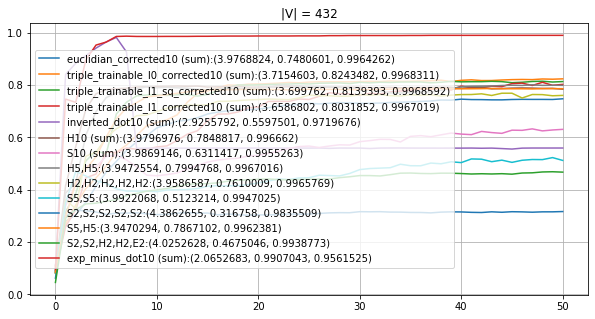

0.7480601	euclidian_corrected10 (sum)
0.8243482	triple_trainable_l0_corrected10 (sum)
0.8139393	triple_trainable_l1_sq_corrected10 (sum)
0.8031852	triple_trainable_l1_corrected10 (sum)
0.5597501	inverted_dot10 (sum)
0.7848817	H10 (sum)
0.6311417	S10 (sum)
0.7994768	H5,H5
0.7610009	H2,H2,H2,H2,H2
0.5123214	S5,S5
0.316758	S2,S2,S2,S2,S2
0.7867102	S5,H5
0.4675046	S2,S2,H2,H2,E2
0.9907043	exp_minus_dot10 (sum)


In [128]:
total_loss_story_s2 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances()+make_distances_exp_dot(), iters=1000, learning_rate=0.05,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

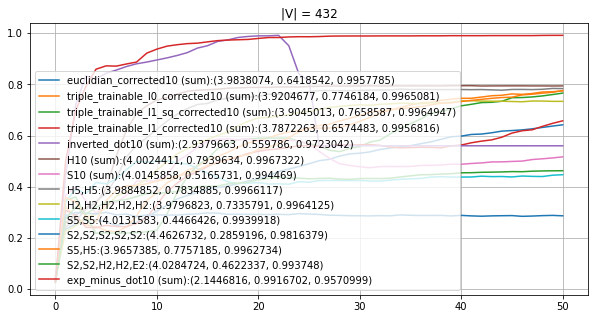

0.6418542	euclidian_corrected10 (sum)
0.7746184	triple_trainable_l0_corrected10 (sum)
0.7658587	triple_trainable_l1_sq_corrected10 (sum)
0.6574483	triple_trainable_l1_corrected10 (sum)
0.559786	inverted_dot10 (sum)
0.7939634	H10 (sum)
0.5165731	S10 (sum)
0.7834885	H5,H5
0.7335791	H2,H2,H2,H2,H2
0.4466426	S5,S5
0.2859196	S2,S2,S2,S2,S2
0.7757185	S5,H5
0.4622337	S2,S2,H2,H2,E2
0.9916702	exp_minus_dot10 (sum)


In [129]:
total_loss_story_s3 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances()+make_distances_exp_dot(), iters=1000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

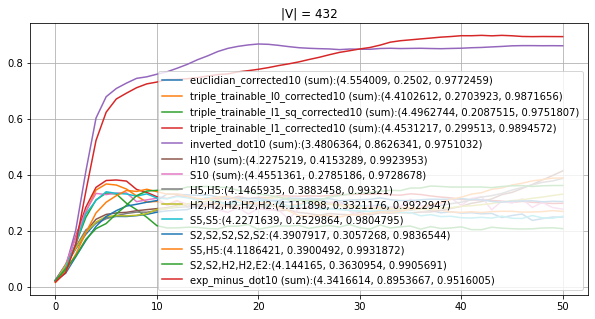

0.2502	euclidian_corrected10 (sum)
0.2703923	triple_trainable_l0_corrected10 (sum)
0.2087515	triple_trainable_l1_sq_corrected10 (sum)
0.299513	triple_trainable_l1_corrected10 (sum)
0.8626341	inverted_dot10 (sum)
0.4153289	H10 (sum)
0.2785186	S10 (sum)
0.3883458	H5,H5
0.3321176	H2,H2,H2,H2,H2
0.2529864	S5,S5
0.3057268	S2,S2,S2,S2,S2
0.3900492	S5,H5
0.3630954	S2,S2,H2,H2,E2
0.8953667	exp_minus_dot10 (sum)


In [130]:
total_loss_story_s4 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances()+make_distances_exp_dot(), iters=1000, learning_rate=0.001,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

In [131]:
s_storyz = [total_loss_story_s1, total_loss_story_s2, total_loss_story_s3, total_loss_story_s4]
for d, l0, l1, l2, l3 in zip(make_distances()+make_distances_exp_dot(), *s_storyz):
    ar = np.array([x[-1] for x in [l0, l1, l2, l3]])
    # print(f"{ar[:, 0].argmin(), ar[:, 1:].argmax(axis=0)}\t{d}")
    print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

(3.9768824, 0.7658867, 0.9964608)	euclidian_corrected10 (sum)
(3.6061679, 0.8243482, 0.9968311)	triple_trainable_l0_corrected10 (sum)
(3.5519868, 0.8139393, 0.9968592)	triple_trainable_l1_sq_corrected10 (sum)
(3.6279522, 0.8031852, 0.9967019)	triple_trainable_l1_corrected10 (sum)
(2.9255792, 0.8626341, 0.9751032)	inverted_dot10 (sum)
(3.9770045, 0.7939634, 0.9967322)	H10 (sum)
(3.9746701, 0.6892885, 0.9958719)	S10 (sum)
(3.9315623, 0.7994768, 0.9967016)	H5,H5
(3.9220521, 0.7610009, 0.996615)	H2,H2,H2,H2,H2
(3.982686, 0.5217047, 0.9947025)	S5,S5
(4.3718392, 0.3336669, 0.9837141)	S2,S2,S2,S2,S2
(3.9424274, 0.7867102, 0.9962734)	S5,H5
(4.0136542, 0.4817409, 0.9941823)	S2,S2,H2,H2,E2
(2.0652683, 0.9916702, 0.9570999)	exp_minus_dot10 (sum)


In [132]:
storyz = [total_loss_story, total_loss_story_2, total_loss_story_3, total_loss_story_4]
for d, l0, l1, l2, l3 in zip(make_distances()+make_distances_exp_dot(), *storyz):
    ar = np.array([x[-1] for x in [l0, l1, l2, l3]])
    # print(f"{ar[:, 0].argmin(), ar[:, 1:].argmax(axis=0)}\t{d}")
    print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

(0.0938976,)	euclidian_corrected10 (sum)
(0.0943908,)	triple_trainable_l0_corrected10 (sum)
(0.091859,)	triple_trainable_l1_sq_corrected10 (sum)
(0.0818883,)	triple_trainable_l1_corrected10 (sum)
(0.0794567,)	inverted_dot10 (sum)
(0.0949658,)	H10 (sum)
(0.0998786,)	S10 (sum)
(0.089521,)	H5,H5
(0.086398,)	H2,H2,H2,H2,H2
(0.1072071,)	S5,S5
(0.1476837,)	S2,S2,S2,S2,S2
(0.0936723,)	S5,H5
(0.097779,)	S2,S2,H2,H2,E2
(0.0783554,)	exp_minus_dot10 (sum)


/home/shevkunov/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


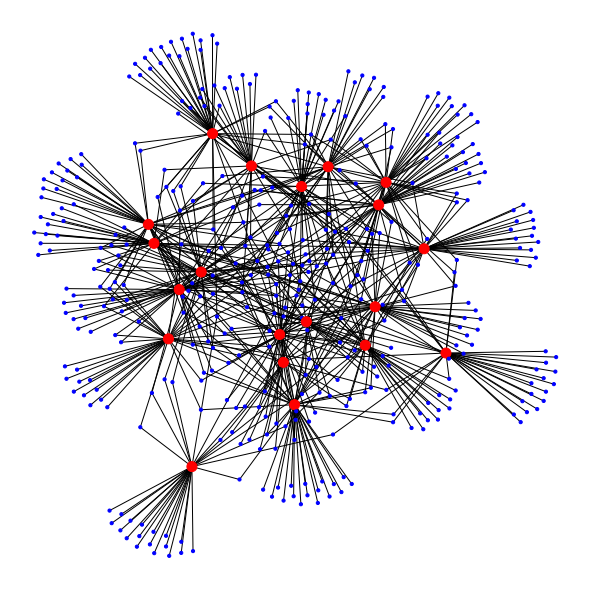

In [9]:
import networkx as nx
plt.figure(figsize=(8, 8))
nx.draw_spring(G,
    node_color=["red" if (x < 20) else "blue" for x in G.nodes()],
    node_size=[100 if (x < 20) else 10 for x in G.nodes()]
)
plt.savefig("bg.png")

In [138]:
G.edges()

EdgeView([(0, 53), (0, 79), (0, 110), (0, 112), (0, 122), (0, 123), (0, 177), (0, 252), (0, 289), (0, 293), (0, 300), (0, 311), (0, 330), (0, 344), (0, 353), (0, 359), (0, 386), (0, 395), (0, 477), (0, 492), (0, 493), (0, 527), (0, 546), (0, 550), (0, 581), (0, 588), (0, 598), (0, 613), (0, 646), (0, 680), (53, 18), (177, 3), (177, 4), (300, 2), (311, 13), (353, 17), (359, 8), (386, 14), (477, 11), (493, 12), (527, 3), (550, 4), (550, 8), (550, 12), (588, 5), (598, 16), (646, 14), (1, 31), (1, 85), (1, 102), (1, 115), (1, 144), (1, 206), (1, 209), (1, 216), (1, 225), (1, 239), (1, 257), (1, 259), (1, 262), (1, 266), (1, 286), (1, 338), (1, 346), (1, 361), (1, 398), (1, 452), (1, 474), (1, 485), (1, 508), (1, 531), (1, 533), (1, 540), (1, 572), (1, 578), (1, 585), (1, 611), (1, 612), (1, 624), (1, 643), (1, 669), (1, 683), (1, 710), (85, 14), (85, 18), (115, 16), (144, 13), (206, 4), (206, 9), (206, 13), (209, 13), (239, 4), (257, 15), (262, 6), (266, 12), (286, 13), (338, 6), (361, 9),

In [145]:
distances_matrix[3]

array([1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 6, 4, 6, 4, 4, 4, 4, 6, 6, 4, 6, 6,
       6, 4, 4, 6, 6, 6, 4, 4, 6, 6, 6, 6, 6, 4, 6, 4, 6, 4, 6, 6, 6, 6,
       6, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 4, 4, 6, 6, 6, 6, 6, 4, 4, 4, 6, 4, 4, 4, 4, 4, 6, 6, 4, 6, 4,
       6, 6, 5, 4, 4, 6, 4, 6, 4, 6, 6, 6, 6, 6, 6, 4, 6, 6, 4, 4, 6, 4,
       4, 6, 4, 6, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 4, 6, 6, 6, 6, 4, 4, 6,
       6, 5, 6, 6, 6, 6, 6, 4, 6, 6, 6, 4, 6, 6, 6, 4, 6, 4, 6, 4, 4, 4,
       6, 6, 4, 6, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [147]:
G.nodes()

NodeView((0, 53, 79, 110, 112, 122, 123, 177, 252, 289, 293, 300, 311, 330, 344, 353, 359, 386, 395, 477, 492, 493, 527, 546, 550, 581, 588, 598, 613, 646, 680, 1, 31, 85, 102, 115, 144, 206, 209, 216, 225, 239, 257, 259, 262, 266, 286, 338, 346, 361, 398, 452, 474, 485, 508, 531, 533, 540, 572, 578, 585, 611, 612, 624, 643, 669, 683, 710, 2, 28, 71, 97, 125, 132, 195, 260, 296, 301, 310, 315, 321, 366, 380, 402, 411, 431, 439, 465, 589, 591, 597, 599, 604, 625, 656, 658, 665, 690, 3, 68, 124, 145, 166, 181, 267, 285, 294, 302, 323, 335, 336, 390, 393, 396, 432, 440, 449, 468, 479, 520, 542, 557, 584, 629, 639, 649, 652, 659, 677, 688, 689, 4, 30, 55, 59, 236, 240, 247, 291, 299, 350, 404, 486, 491, 505, 509, 554, 577, 648, 695, 702, 705, 5, 50, 57, 63, 87, 104, 106, 128, 180, 194, 224, 269, 320, 367, 370, 372, 384, 399, 460, 462, 532, 565, 640, 651, 6, 39, 84, 95, 151, 196, 197, 203, 249, 292, 305, 340, 349, 362, 374, 387, 400, 421, 496, 559, 620, 627, 635, 676, 7, 35, 37, 47, 66, 80,